### Gradient boosting: 

- Gradient boosting is a machine learning technique used in regression and classification tasks, among others. 

- It gives a prediction model in the form of an ensemble of weak prediction models, which are typically decision trees.

- When a decision tree is the weak learner, the resulting algorithm is called gradient-boosted trees; it usually outperforms random forest.


- A gradient-boosted trees model is built in a stage-wise fashion as in other boosting methods, but it generalizes the other methods by allowing optimization of an arbitrary differentiable loss function.

## Bagging : 
    
    Base learners      +    row sampling     + aggregation 
    [high variance]        column sampling
    [low bias]              [reduce variance]
    
    .
    .
    
    
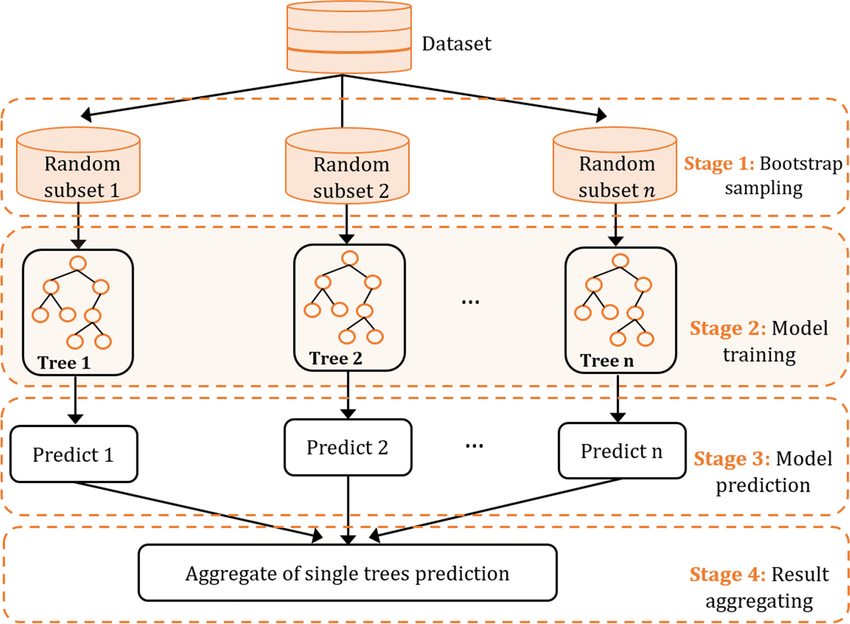

    .
    .
---------------------------------------------------------------
---------------------------------------------------------------
---------------------------------------------------------------

## Boosting : 





    base learners      +   additive combine 
    [high BIAS]          ( reduce the bias 
    [low Variance]           keeping variance low)
  
    (underfit)
    
    
    - Adaptive boosting (Adaboost)
    - Gradient Boosting
    - XGboost
    

    

### GBDT : Gradient Boost Decision Tree : 

    - learning is sequancial in GBDT. 
    

    When base learners : Decision trees with samll depth : 
    core idea : reduce the bias , keeping variance low. 
    
    - regression and classification we can do both . 

### steps :     
    
                task regression : 
    
            Dtrain : { X(i),y(i) }i = 1 to n : 


    step0 :       step A:       Dtrain : with whole data :
                                 create a model M0.
                                 with high bias, low variance : 
                                 with depth_max = 1 or 2 
                                 (decision stump)
                           (in this case , we will predict average of y)
                       
                              F0 = y^ = h0(x)   (average model)
                                                  (very large training model)
                                                  
                 Step B : we find residuals from previous prediction (y-bar)
                             
                             errors(i) = y(i) - y^(i)   (difference only)
                             
           for each data points 
           now we have 
               {x(i),y(i) and error(i)} i = 1 to n 
        
        
    step 1 : 
    
                Now we create the first model , that can predict the errors which model 0 was making. 
                
                {X(i) , error(i)}   --- > M1 model with low depth 
                 input    output         h1(x)
                 
                 M1 = h1(x)
         
         
         
         F1(x) = ModelS at the end of stage 1 
                 
         
         F1(X) =   h0(x)   +  l *  h1(x)
                 (average     (first)
                  model)       model 
                               with some  
                               weight lambda l
                         
    step 2 : 
    
        another model which will predict the errors of the mnodel 1 .
        
            {X(i) , error(i)}
                      (errors that F1(x) model-1 was making)
                         y(i) - prediction from Model-1
                           y(i)-F1(x(i))  

                  
                 still there will be some gap between 
                 actual and previous error.
                 that gap model-2 will predict.
                 
                 
                  
         F2(X) =   h0(x)   +  l *  h1(x)    +   l * h2(x)
                 (average     (first)           2nd model with some weight
                  model)       model 
                               with some  
                               weight 



            .
            .
            .
            .
            
            we keep doing this till the error is minimised . 
            
       Fm(X)      = h0(x) + l1*h1(X) +  l2*h2(X) + . . . + lm hm(X)
       (final model of boosting)
       
       
       we are keep reducing the errors till we reach close to the actual value. 


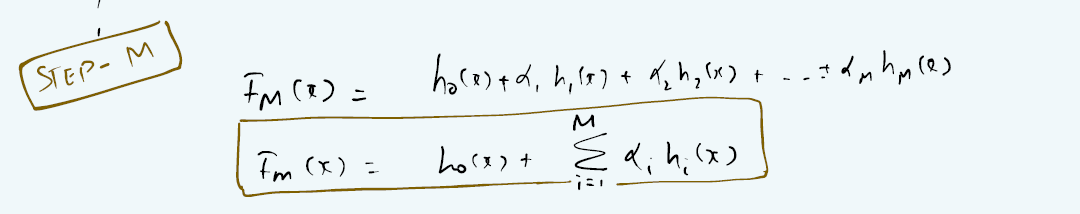

    .
    .
    .
    .
       
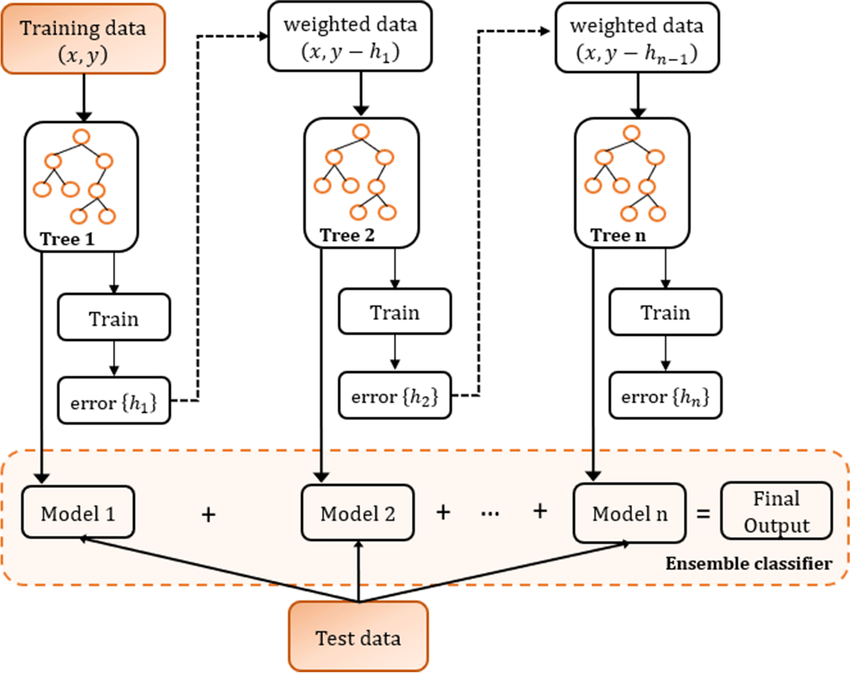       

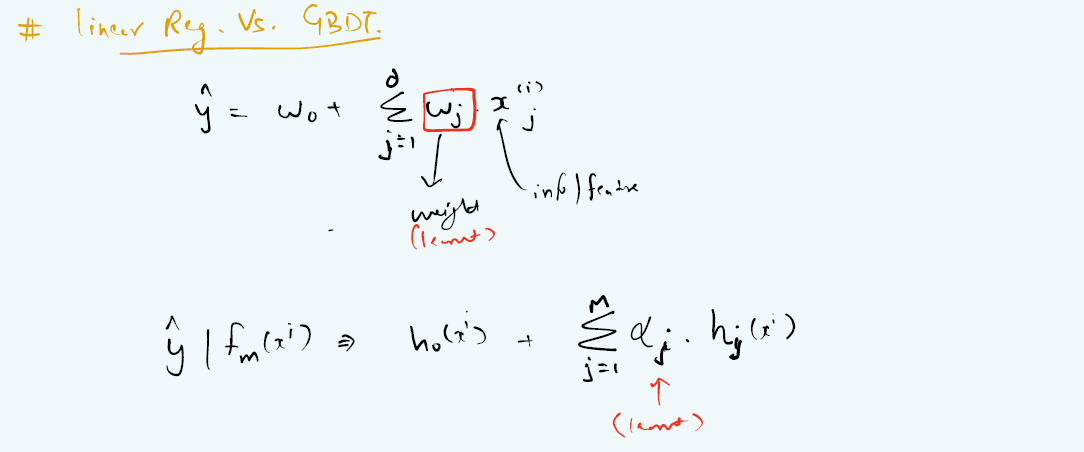

### Example: 

       LETS say a data point (Xnew) and output is 12.6
        and model 0 : average model predicts 7 .
        h0(Xnew) = 7
        
        error = 12.6-7 = 5.6
        
        model 1 , now instead of y , it will predict the previous error 5.6
        h1(Xnew) --> 5.6(suppose to predict)
        since this h1 model is also high bias model 
        it will make mistake and wont predict 5.6. 
        
        h1(Xnew) =  3.1 (predicted)
        
        F1(Xnew) = h0(Xnew) + l1 * h1(Xnew)
                 = 7 + 0.5*3.1
                      0.5 is l1 as some weightage
               
                 = 7+1.55 
                 = 8.55  (a step closer to 12.6)
                
        now        
        error = 12.6-8.55
              = 4.05
         
        now  goal of model2 to predict 4.05 error 
        
        F2(Xnew) = h0(Xnew) + l1*h1(Xnew) + l2*h2(Xnew)
                 =   7  +      0.5*3.1    + (0.6 * 2)
                 =  (        8.55       ) +     1.2
                 = 8.55+1.2
                 = 9.75
         
         Similarly the next model supports the previous model by additively combining models, by minimising the overall error and getting closer to actual y. 
                 
                      
        
        

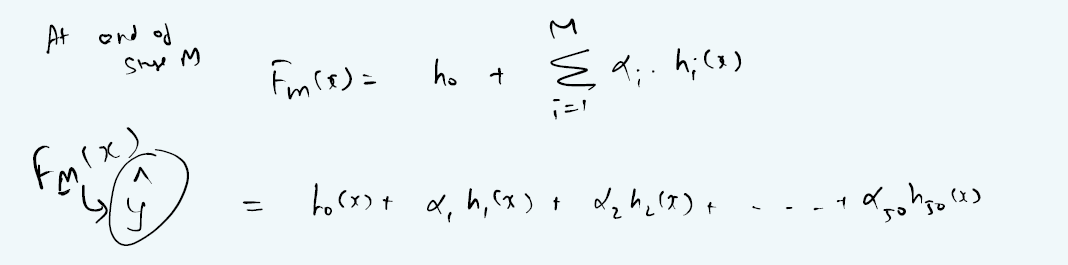

        - every step model , is trying to cover up  the previous mistakes.
        (sequential )

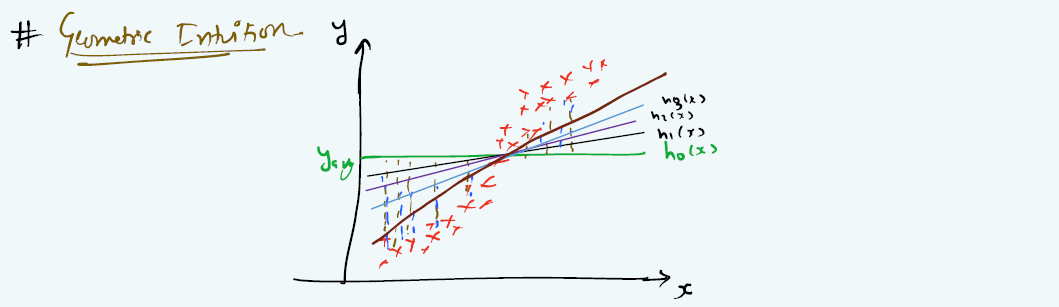

### hat we are learning : 
     all the alpha (weights of all models(of base learners))
     + 
     base decision tree learners. 
     
     
     

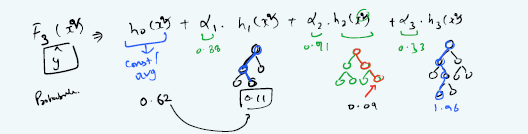

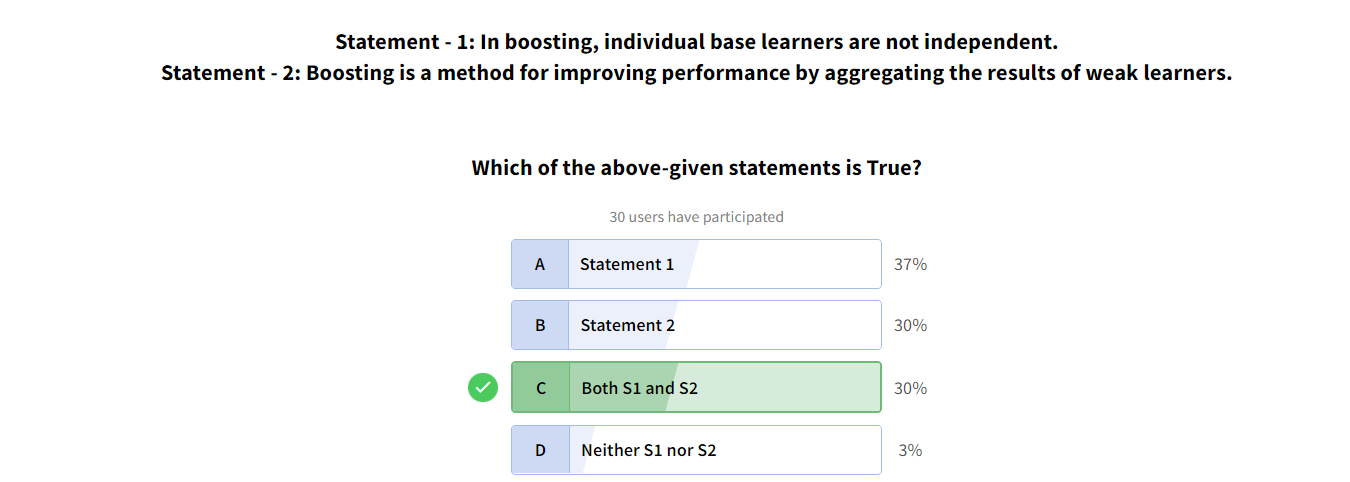

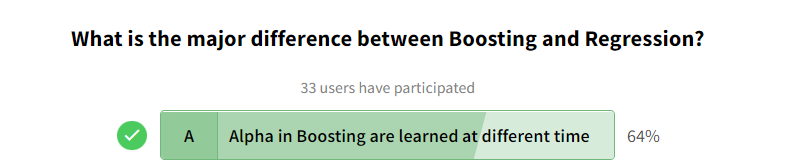

## Residuals , Pseudo Residuals and Loss function : 

    Trained
    final       Fk(X) = h0(X) + a1*h1(x) + a2*h2(x) + ...  + ak*hk(x)
    model
    at the 
    end of 
    stage k : 
    
    
    Errors at the end of k stage : 
    
        Residuals/error(i) = y(i) - Fk(X(i))
        
    {X(i),error(i)}  use residuals to train Fk+1(X) model. 
    
    
    which loss function we can use : 
    
    Loss Function : 
        
        for every X(i) -- > y(i)
        
         --    Fk(X(i)) ~~ y^(i)  - predicted
         
         
         
         Loss function  L(y , y^):
        
        in case of regression problem, loss function will  be a squared loss : 
        
        L(y,y^)
        
        L(y(i), Fk(x(i))) = (y*(i) - Fk(X(i)))^2  (squared loss)
                   (y^(i))
         
         Fk(x(i)) = z(i)
         
         L = (y(i)-z(i))^2
         
         dL/dz(i) = 2 (y(i)-Z(i)) (dz(i)/dz(i))
         
                  = -2 (y(i)-z(i))
         - dL/dz(i) = 2 (y(i)-z(i))
                  
                  = 2 * residuals
                  
          -dL/dz(i) is call negative gradient
          
          
          negative gradient ~~ is approximately ~ pseudo residual
                                                 (not exactly = residual)

    assume the loss is difference:"huber loss"
    
    
    
    at the jth model : 
    
      hj(x) <--- {X(i),error(i)}
                
                       error(i) = y(i) - Fj-1(X)
                       error(i) = residuals  
                       
                       error(i) ~~ pseudo  residual
                              
                              = - dL/
                                dFj-1(x)
                                
                                
              to generalised the errors , we use pseudo residuals
              instead of residuals(which only work for MSE)
              
              use this pseudo residuals to train the next model. 
              
              
              thus, GBDT is powerful hence it can work for any loss function.
              
           \
           
           
           
#### SUMMURISE : 
     
     at end of stage 'p' : 
     
     Fp(X)
     final 
     model at stage p : 
     
     Fp(X) = h0(X) + a1*h1(X) + a2*h2(X) + ...  + ap*hp(X)
     
           = Fp-1(X) + ap*hp(X)
           
           to train hp(X) : {X(i), error(i)}
                                 
                                   error(i) = -dL/
                                             dFp-1(X)
                                             
                                             
                                 error(i) = y(i) - Fp-1(X)       
                                 error(i) ~~ pseudo  residual
                              
                                          = - dL/
                                            dFp-1(x)


                       
                      
          
                  
                  
                  
                
                  
        
        
        

- Gradient boosting is a machine learning technique used in regression and classification tasks, among others. 
- It gives a prediction model in the form of an ensemble of weak prediction models, which are typically decision trees.
- When a decision tree is the weak learner, the resulting algorithm is called gradient-boosted trees; it usually outperforms random forest.


- `A gradient-boosted trees model is built in a stage-wise fashion as in other boosting methods, but it generalizes the other methods by allowing optimization of an arbitrary differentiable loss function.`

https://en.wikipedia.org/wiki/Gradient_boosting

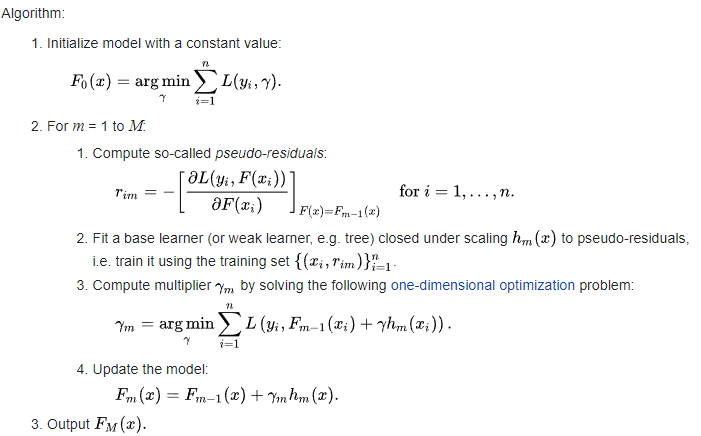